In [33]:
import pandas as pd

datafile='zscoredata.xls'
zscoredfile='new_zscoredata.xls'

data=pd.read_excel(datafile)
data=(data-data.mean(axis=0))/data.std(axis=0)

data.columns=['Z'+i for i in data.columns]

data.to_excel(zscoredfile,index=False)
data.head()

,ZL,ZR,ZF,ZM,ZC
0,1.689882,0.140299,-0.635788,0.068794,-0.337186
1,1.689882,-0.322442,0.852453,0.843848,-0.553613
2,1.681743,-0.487707,-0.210576,0.158569,-1.094680
3,1.534185,-0.785184,0.002030,0.273091,-1.148787
4,0.890167,-0.426559,-0.635788,-0.685170,1.231909


In [46]:
import pandas as pd
from sklearn.cluster import KMeans

inputfile='new_zscoredata.xls'
k=5

data=pd.read_excel(inputfile)

kmodel=KMeans(n_clusters=k,n_jobs=-1)
kmodel.fit(data)

kmodel.cluster_centers_
kmodel.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

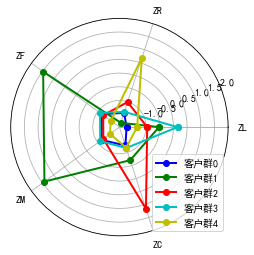

In [44]:
import numpy as np
import matplotlib.pyplot as plt

labels = data.columns   #标签
k = 5     #数据个数
plot_data = kmodel.cluster_centers_
color = ['b', 'g', 'r', 'c', 'y'] #指定颜色

angles = np.linspace(0, 2*np.pi, k, endpoint=False)
#np.linspace函数：生成一个等差数列，用来当做角度,endpoint=False不包含终值2pi
#这个角度应该是五角星图五个轴的角度分布
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) # 闭合
#np.concatenate函数: 将两个array数组进行拼接,axis=1说明是跨列 水平方向的拼接
#拼接后的数据类似下面，第一列和最后一列的数据相同
'''
[[-0.31321639  1.68682327 -0.57391382 -0.5367476  -0.17484976 -0.31321639]
 [-0.70030802 -0.41503955 -0.16081343 -0.16052895 -0.25734436 -0.70030802]
 [ 0.4836574  -0.79940021  2.4831749   2.42445945  0.30923797  0.4836574 ]
 [ 0.04421627 -0.00258413 -0.23043928 -0.23494195  2.17504264  0.04421627]
 [ 1.16081445 -0.37743605 -0.0866912  -0.09460942 -0.15676924  1.16081445]]
'''
angles = np.concatenate((angles, [angles[0]])) # 闭合
#array([0. , 1.25663706 , 2.51327412 , 3.76991118 , 5.02654825 , 0.])

fig = plt.figure() #生成一块绘图布
ax = fig.add_subplot(111, polar=True) #polar参数  雷达图极坐标
for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = u'客户群'+str(i), linewidth=2)# 画线，每行没一个客户群

ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei") #设置极径网格线显示
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei") #设置网格的角度
plt.legend(loc=4)#标记在4象限
plt.show()